# Sklearn statistical machine learning

## Train test split, Standardize (columns) and normalize (rows)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
n = 10000
p = 40
rng = np.random.RandomState(8888)
x_mat = rng.normal(size=(n,p))
beta_true = rng.normal(size = p)
y = np.dot(x_mat,beta_true) + rng.normal(size=n)

(array([  22.,  158.,  658., 1704., 2741., 2637., 1465.,  505.,   89.,
          21.]),
 array([-21.44136517, -17.06860753, -12.69584989,  -8.32309224,
         -3.9503346 ,   0.42242304,   4.79518068,   9.16793833,
         13.54069597,  17.91345361,  22.28621125]),
 <BarContainer object of 10 artists>)

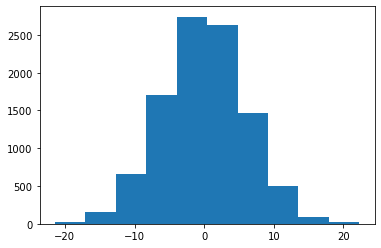

In [3]:
plt.hist(y)

In [4]:
## make random class
z = np.zeros_like(y)
z[y>10] = 3
z[y<-10] = 2

`train_test_split`: __`stratify`__: classification label

In [5]:
tr_X, ts_X, tr_Y, ts_Y = train_test_split(x_mat,y,test_size=0.2,random_state =0)

In [6]:
tr_X, ts_X, tr_z, ts_z = train_test_split(x_mat,z,test_size=0.2,random_state =0,stratify=z)

In [7]:
print(sum(tr_z==3)/len(tr_z),sum(ts_z==3)/len(ts_z))

0.0465 0.0465


In [8]:
print(sum(tr_z==2)/len(tr_z),sum(ts_z==2)/len(ts_z))

0.048625 0.0485


In [9]:
print(sum(tr_z==0)/len(tr_z),sum(ts_z==0)/len(ts_z))

0.904875 0.905


#### `StandardScaler` defaults `with_mean=True` and  `with_std=True` can be adjusted

In [67]:
standardizer = StandardScaler().fit(tr_X)
tr_X = standardizer.transform(tr_X)
ts_X = standardizer.transform(ts_X)

In [68]:
tr_X.mean(axis=0)

array([-2.57576079e-17,  3.62487818e-17,  3.78239107e-17, -1.78329573e-18,
       -1.99840144e-18, -2.88380431e-17, -6.97497615e-17, -3.85247390e-17,
       -8.18789481e-18,  3.36952688e-17,  8.84015083e-18,  7.82728916e-17,
       -3.38062911e-17, -3.20021787e-17, -3.61516372e-18, -1.12132525e-17,
        2.85604873e-17, -3.18911564e-17,  1.92484917e-17,  2.15938378e-17,
       -5.09314813e-17, -2.77555756e-19, -3.46944695e-18, -4.95298247e-17,
        7.60502772e-18, -1.37390099e-17, -2.04974926e-17, -1.00336406e-17,
        3.06005221e-18, -1.61988478e-17,  8.38218384e-18,  4.79200013e-17,
       -2.23709939e-17,  6.65023592e-17, -2.62984079e-17, -2.89490654e-17,
        2.68396416e-17,  2.70616862e-17, -1.72570291e-17,  3.37299633e-17])

In [69]:
tr_X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

#### `Normalizer` default is `l2`, `l1` and `max` are available

In [70]:
normalizer = Normalizer().fit(tr_X)
tr_X_norm = normalizer.transform(tr_X)
ts_X_norm = normalizer.transform(ts_X)

In [79]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

In [80]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

## Naive Bayes

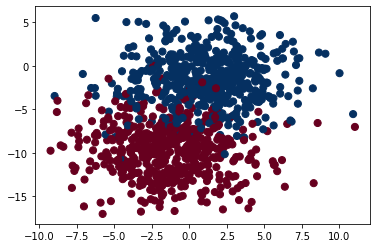

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, 2, centers=2, random_state=2, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

### `Gaussian`, `multinomial` and `Categorical`. `Complement Naive Bayes` is for imblanced `multinomial`. Except for `Gaussian`, the rest are for counts data, popular in text classification and simple NLP.

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
tr_X, ts_X, tr_Y, ts_Y = train_test_split(X,y,test_size=0.2,random_state =0)
model.fit(tr_X, tr_Y)
predicted_y = model.predict(ts_X);

In [26]:
predict_proba =  model.predict_proba(ts_X);

### Classification results: `classification_report` and `confusion_matrix`

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ts_Y,predicted_y)

#### true is y-axis and predicted is x-axis

In [28]:
mat

array([[107,   2],
       [  9,  82]], dtype=int64)

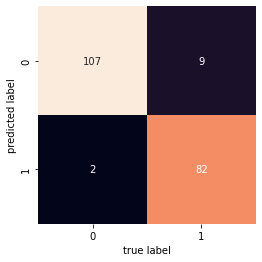

In [29]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
from sklearn.metrics import classification_report
print(classification_report(predicted_y, ts_Y))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      0.99        90

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [35]:
?metrics.roc_curve

Signature:
metrics.roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : ndarray of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : ndarray of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,)

In [87]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ts_Y, predict_proba[:,0],pos_label = 0)
auc_results = auc(fpr, tpr)

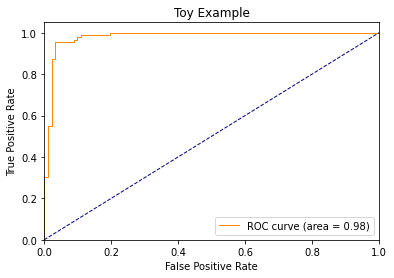

In [105]:
plt.figure()
lw = 1
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f'ROC curve (area = {np.round(auc_results,2)})',
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Toy Example")
plt.legend(loc="lower right")
plt.show()

#### manual calculation of AUC

__tripozoidal approach__

In [102]:
sum((fpr[1:n_fpr] - fpr[:n_fpr-1]) * ( tpr[1:n_fpr] + tpr[:n_fpr-1]) /2)

0.9820546426051013

### `AdaBoost`

In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
X, y = make_regression(n_samples=1000, n_features=50, n_informative=10,noise= 2,
                      random_state=0, shuffle=False)

In [74]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size = 0.2, random_state= 8888)

In [81]:
params_grid = {'alpha': np.logspace(-6,6,20),'l1_ratio': np.linspace(0,1,11)}

In [91]:
en_model = ElasticNet()
en_model_grid = GridSearchCV(model,param_grid = params_grid,cv=5, n_jobs=-1)
en_model_grid.fit(X_tr,Y_tr)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [92]:
en_model_grid.best_estimator_

ElasticNet(alpha=0.11288378916846883, l1_ratio=1.0)

In [93]:
en_model_best_mse = mean_squared_error(en_model_grid.best_estimator_.predict(X_ts),Y_ts)
en_model_best_mse

4.490568825516849

In [94]:
np.arange(50,501,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [168]:
params_grid_boost = {'learning_rate':np.linspace(1,5,10), 'n_estimators':np.arange(2,20,1),'loss':["linear", "square", "exponential"]} 

In [173]:
base_model = en_model_grid.best_estimator_
adboost_regr = AdaBoostRegressor(base_estimator = base_model,random_state=0)
ada_grid = GridSearchCV(adboost_regr,param_grid = params_grid_boost,cv=5, n_jobs=-1)
ada_grid.fit(X_tr,Y_tr)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.11288378916846883,
                                                                   l1_ratio=1.0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [174]:
ada_grid.best_estimator_

AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.11288378916846883,
                                            l1_ratio=1.0),
                  loss='exponential', n_estimators=4, random_state=0)

In [175]:
ada_en_model_best_mse = mean_squared_error(ada_grid.best_estimator_.predict(X_ts),Y_ts)
ada_en_model_best_mse

4.41862800471854

In [176]:
np.round((en_model_best_mse - ada_en_model_best_mse )/en_model_best_mse * 100,2)

1.6

### SVM

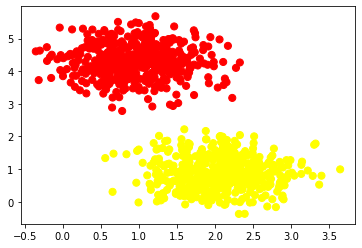

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

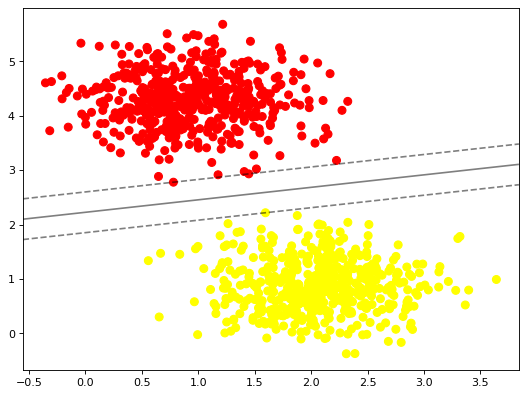

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [16]:
model.support_vectors_

array([[0.78007558, 2.7807158 ],
       [1.44779312, 2.93394874],
       [1.59544218, 2.21913152]])

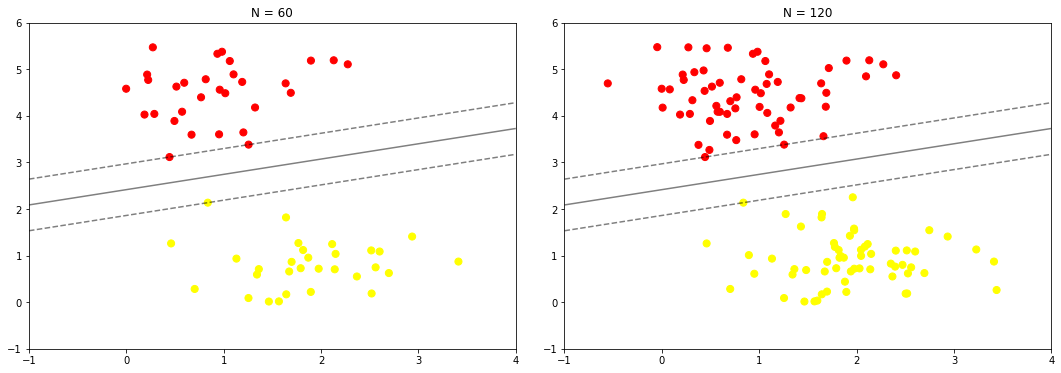

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [19]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

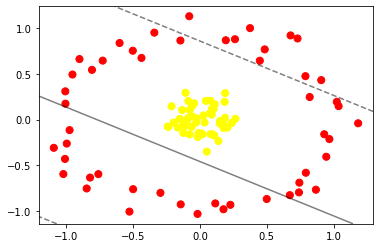

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

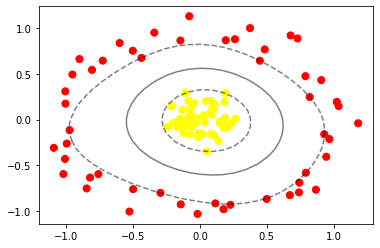

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [23]:
## dashed line
clf.support_vectors_

array([[ 0.11444398, -0.91791858],
       [-0.97655353, -0.1146482 ],
       [ 0.82122403,  0.24779531],
       [-0.29623943, -0.80227277],
       [ 0.79242869, -0.58189677],
       [ 0.44785143,  0.64571675],
       [ 0.93028005, -0.15996558],
       [-0.43814741,  0.67616034],
       [ 0.18806949,  0.29116937],
       [-0.10831575,  0.29434467],
       [ 0.05097163, -0.35078239]])

## SVM Summary
- The scaling with the number of samples N is $O[N^3]$ at worst, or $O[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.

### Principal Component Regression vs Partial Least Squares Regression

PCR is a regressor composed of two steps: first, PCA is applied to the training data, possibly performing dimensionality reduction; then, a regressor (e.g. a linear regressor) is trained on the transformed samples. In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. As a result, PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance. 

While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data. To address such limitation, manifold learning such as multidimensional scaling (MDS), locally linear embedding (LLE), and isometric mapping (IsoMap) as well as more recent development of auto-encoder could be used.

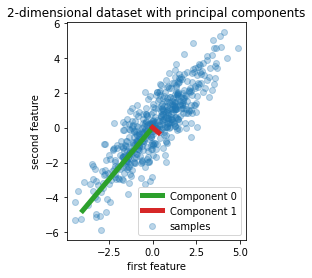

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


#### large variance direction is the first, but second dimension with lower variance hold higher predictive power

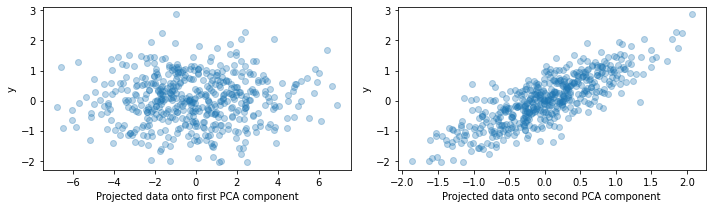

In [25]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

## if we change n_components = 2, we will have same result
n_comp = 1
pcr = make_pipeline(StandardScaler(), PCA(n_components=n_comp), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=n_comp)
pls.fit(X_train, y_train)

# fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
# axes[0].scatter(
#     pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
# )
# axes[0].set(
#     xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
# )
# axes[0].legend()
# axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
# axes[1].scatter(
#     pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
# )
# axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
# axes[1].legend()
# plt.tight_layout()
# plt.show()

PLSRegression(n_components=1)

In [61]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.671
PLS r-squared 0.671
